In [3]:
groq_api_key = "YOUR_GROQ_API_KEY"

In [4]:
models = [
    "deepseek-r1-distill-llama-70b",
    "deepseek-r1-distill-qwen-32b",
    "llama-3.3-70b-specdec",
    "llama-3.2-11b-vision-preview",
    "llama-3.2-3b-preview",
    "llama-3.2-1b-preview"
]

In [5]:
original_texts = [
    'วันนี้อากาศดีมาก', 'ฉันชอบอ่านหนังสือเกี่ยวกับปัญญาประดิษฐ์', 'การเดินทางช่วยเปิดโลกทัศน์ของเรา',
    'เทคโนโลยีกำลังเปลี่ยนแปลงวิถีชีวิตของเรา', 'แมวของฉันชอบนอนในที่อุ่น', 'การเรียนรู้ไม่มีที่สิ้นสุด',
    'คุณชอบฟังเพลงประเภทไหน', 'การออกกำลังกายทำให้ร่างกายแข็งแรง', 'หนังสือเล่มนี้สนุกและได้ความรู้',
    'ธรรมชาติมอบความสงบและพลังใจ', 'คุณเคยไปเที่ยวภูเขาบ้างไหม', 'การเขียนโค้ดเป็นทักษะที่สำคัญในยุคนี้',
    'ชีวิตคือการเดินทางที่ไม่มีวันหยุด', 'กาแฟยามเช้าทำให้ฉันรู้สึกสดชื่น', 'ฉันกำลังเรียนรู้เกี่ยวกับการพัฒนาโมเดลปัญญาประดิษฐ์',
    'อากาศวันนี้สดชื่นมาก', 'ฟ้าสดใสจนทำให้รู้สึกดีทั้งวัน', 'อากาศเย็นสบายเหมาะกับการออกไปเดินเล่น',
    'วันนี้ไม่มีฝนและอากาศก็ดีมาก', 'แดดอ่อนๆ และลมเย็นทำให้อารมณ์ดี', 'หนังสือเกี่ยวกับ AI เป็นสิ่งที่ฉันโปรดปราน',
    'ฉันสนใจเรื่องปัญญาประดิษฐ์และหาหนังสือมาอ่านบ่อยๆ', 'การอ่านหนังสือ AI ทำให้ฉันเข้าใจเทคโนโลยีมากขึ้น',
    'ปัญญาประดิษฐ์เป็นหัวข้อที่ฉันชอบศึกษา', 'ฉันมักจะเลือกหนังสือที่เกี่ยวกับ AI มาอ่านเสมอ',
    'การเดินทางทำให้เราเห็นมุมมองใหม่ๆ', 'การไปสถานที่ใหม่ช่วยให้เราเรียนรู้มากขึ้น', 'การท่องเที่ยวช่วยเพิ่มประสบการณ์ชีวิต',
    'การเดินทางไกลทำให้เราเข้าใจวัฒนธรรมอื่นๆ', 'ทุกครั้งที่เดินทาง ฉันได้เรียนรู้อะไรใหม่ๆ', 'เทคโนโลยีสมัยใหม่มีผลต่อชีวิตประจำวันของเรา',
    'ชีวิตของเราถูกขับเคลื่อนด้วยนวัตกรรมเทคโนโลยี', 'เทคโนโลยีช่วยให้เราทำสิ่งต่างๆ ได้สะดวกขึ้น', 'ยุคดิจิทัลเปลี่ยนแปลงทุกอย่างในชีวิตประจำวัน',
    'เรากำลังอยู่ในยุคที่เทคโนโลยีคือหัวใจสำคัญ', 'แมวที่บ้านมักจะหาที่อุ่นๆ นอนเสมอ', 'แมวของฉันชอบขดตัวอยู่บนผ้าห่ม',
    'มันชอบนอนในที่ที่แสงแดดส่องถึง', 'เจ้าเหมียวชอบซุกตัวในมุมอุ่นๆ', 'แมวของฉันนอนบนหมอนอุ่นทั้งวัน',
    'ไม่มีวันไหนที่เราเรียนรู้ไม่ได้', 'การเรียนรู้เป็นกระบวนการที่ไม่เคยหยุดนิ่ง', 'ชีวิตคือการเรียนรู้สิ่งใหม่ๆ เสมอ',
    'เราเรียนรู้ได้จากทุกสถานการณ์ในชีวิต', 'ความรู้อยู่รอบตัวเราให้เราเรียนรู้ตลอดเวลา', 'เพลงแนวไหนที่คุณฟังแล้วรู้สึกผ่อนคลาย',
    'คุณมีเพลงโปรดที่ชอบฟังเป็นพิเศษไหม', 'คุณชอบฟังเพลงที่มีจังหวะแนวไหน', 'เพลงแบบไหนที่ทำให้คุณรู้สึกมีความสุข',
    'คุณชอบฟังเพลงเก่าหรือเพลงใหม่มากกว่ากัน', 'ออกกำลังกายช่วยให้สุขภาพดีขึ้นมาก', 'การออกกำลังกายช่วยเพิ่มพลังงานในชีวิตประจำวัน',
    'เมื่อเราออกกำลังกาย ร่างกายจะกระปรี้กระเปร่า', 'การเล่นกีฬาเป็นวิธีหนึ่งที่ทำให้แข็งแรง', 'สุขภาพดีเริ่มต้นจากการออกกำลังกาย',
    'หนังสือเล่มนี้เต็มไปด้วยเนื้อหาที่น่าสนใจ', 'ฉันชอบเนื้อหาของหนังสือเล่มนี้มาก', 'อ่านหนังสือเล่มนี้แล้วได้ความรู้ใหม่ๆ',
    'หนังสือเล่มนี้ทั้งสนุกและให้ข้อมูลที่ดี', 'ฉันเรียนรู้อะไรหลายอย่างจากหนังสือเล่มนี้', 'การอยู่ใกล้ธรรมชาติทำให้ใจสงบ',
    'ธรรมชาติช่วยให้เรารู้สึกผ่อนคลาย', 'การเดินเล่นในธรรมชาติเสริมสร้างพลังใจ', 'ธรรมชาติเป็นที่พักพิงของจิตใจเรา',
    'อยู่กับธรรมชาติแล้วรู้สึกสดชื่นและสงบ', 'คุณเคยปีนเขาในที่สูงๆ ไหม', 'คุณเคยสัมผัสบรรยากาศภูเขายามเช้าไหม',
    'คุณเคยตั้งแคมป์บนภูเขาหรือยัง', 'คุณมีประสบการณ์เดินป่าบนภูเขาไหม', 'คุณชอบวิวภูเขาที่ปกคลุมด้วยหมอกหรือเปล่า',
    'การเขียนโปรแกรมเป็นทักษะที่จำเป็นในยุคดิจิทัล', 'ทุกคนควรเรียนรู้การเขียนโค้ดในยุคปัจจุบัน', 'การเขียนโค้ดช่วยเพิ่มโอกาสในสายงานเทคโนโลยี',
    'การพัฒนาโค้ดเป็นพื้นฐานสำคัญในอุตสาหกรรม IT', 'การเขียนโปรแกรมทำให้เราแก้ปัญหาได้อย่างสร้างสรรค์', 'ชีวิตคือการเรียนรู้และก้าวไปข้างหน้า',
    'ทุกช่วงเวลาในชีวิตคือการผจญภัยใหม่ๆ', 'ชีวิตเปรียบเสมือนการเดินทางที่ไม่มีจุดสิ้นสุด', 'ทุกวันคือการเดินทางของเราในเส้นทางชีวิต',
    'ชีวิตต้องเดินต่อไปแม้ว่าจะเจออุปสรรค', 'กลิ่นกาแฟยามเช้าทำให้วันเริ่มต้นได้ดี', 'การดื่มกาแฟตอนเช้าทำให้ฉันมีพลัง',
    'กาแฟแก้วแรกช่วยปลุกฉันให้ตื่นเต็มตา', 'รสชาติกาแฟตอนเช้าเป็นสิ่งที่ฉันโปรดปราน', 'กาแฟอุ่นๆ ทำให้เช้าวันใหม่สดใสขึ้น',
    'ฉันกำลังศึกษาวิธีสร้างโมเดล AI', 'การพัฒนาโมเดล AI เป็นสิ่งที่ฉันกำลังฝึกฝน', 'ฉันสนใจการสร้างโมเดล Machine Learning',
    'การเรียนรู้การออกแบบโมเดล AI เป็นเป้าหมายของฉัน', 'ฉันกำลังศึกษาแนวทางใหม่ๆ ในการพัฒนา AI'
]

In [6]:
%pip install numpy matplotlib seaborn sentence-transformers groq scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


In [7]:
import re
import numpy as np
import time
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer
from sklearn.metrics import silhouette_score
from groq import Groq

In [8]:
def find_optimal_clusters(embeddings, max_clusters=10):
    wcss = []  # Within-cluster sum of squares
    silhouette_scores = []

    for n in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=n, random_state=0, n_init=10)
        labels = kmeans.fit_predict(embeddings)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(embeddings, labels))

    # Find the optimal number of clusters based on the highest silhouette score
    optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # +2 because range starts from 2 clusters
    return optimal_clusters

In [9]:
client = Groq(api_key=groq_api_key)

def generate_text(model_name, input_sentence_group):
    start_time = time.time()
    chat_completion = client.chat.completions.create(
        messages=[{"role": "system", "content": "Create a short sentence that comprehensively and coherently covers all the given sentences by:\n\
    1. The sentence must convey a meaning that is close to and covers the concepts of all the given sentences.\n\
    2. Use the same language as the given sentences.\n\
    3. Do not add new content that is not present in the given sentences.\n\
\n\
Create a sentence that meets the above conditions."}, 
                  {"role": "user", 'content': input_sentence_group}],
        model=model_name
    )
    generated_text = chat_completion.choices[0].message.content
    match = re.search(r"</think>\s*(.*)", generated_text, flags=re.DOTALL)
    if match:
        generated_text = match.group(1).strip()
    elapsed_time = time.time() - start_time
    return generated_text, elapsed_time


In [10]:
def is_text_in_center(new_text, mean_embedding, model):
    new_embedding = model.encode([new_text])
    return cosine_similarity(new_embedding, [mean_embedding])[0][0]

In [11]:
def compare_models_with_cosine(input_texts, models, max_clusters=100):
    model = SentenceTransformer('LaBSE')
    sentence_embeddings = model.encode(input_texts)
    
    # Ensure max_clusters does not exceed the number of samples
    max_clusters = min(max_clusters, len(input_texts) - 1)
    optimal_clusters = find_optimal_clusters(sentence_embeddings, max_clusters)
    print(f"🔹 Optimal Clusters: {optimal_clusters}")

    # Group texts using KMeans
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=0, n_init=10)
    labels = kmeans.fit_predict(sentence_embeddings)
    
    clusters = {i: [] for i in range(optimal_clusters)}
    for idx, label in enumerate(labels):
        clusters[label].append(input_texts[idx])

    results = []
    generated_embeddings = []
    model_labels = []
    
    for group_id, group_texts in clusters.items():
        group_embeddings = model.encode(group_texts)
        mean_embedding = np.mean(group_embeddings, axis=0)

        for model_name in models:
            generated_text, elapsed_time = generate_text(model_name, str(group_texts))
            if generated_text:
                similarity = is_text_in_center(generated_text, mean_embedding, model)
                
                results.append({
                    "model": model_name,
                    "generated_text": generated_text,
                    "similarity": similarity,
                    "group": group_id,
                    "time": elapsed_time,
                    "input_text": group_texts
                })

                # Store the vector of the generated text
                gen_embedding = model.encode([generated_text])[0]
                generated_embeddings.append(gen_embedding)
                model_labels.append(model_name)
    
    return results, np.array(generated_embeddings), model_labels, labels, sentence_embeddings, clusters


In [12]:
results, generated_embeddings, model_labels, cluster_labels, original_embeddings, clusters = compare_models_with_cosine(original_texts, models)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


🔹 Optimal Clusters: 19


In [13]:
from pprint import pprint
pprint(results)

[{'generated_text': 'คุณชอบฟังเพลงแนวไหน ที่ทำให้คุณรู้สึกผ่อนคลาย มีความสุข '
                    'หรือมีเพลงโปรดเป็นพิเศษ '
                    'และคุณชอบเพลงเก่าหรือใหม่มากกว่ากัน',
  'group': 0,
  'input_text': ['คุณชอบฟังเพลงประเภทไหน',
                 'เพลงแนวไหนที่คุณฟังแล้วรู้สึกผ่อนคลาย',
                 'คุณมีเพลงโปรดที่ชอบฟังเป็นพิเศษไหม',
                 'คุณชอบฟังเพลงที่มีจังหวะแนวไหน',
                 'เพลงแบบไหนที่ทำให้คุณรู้สึกมีความสุข',
                 'คุณชอบฟังเพลงเก่าหรือเพลงใหม่มากกว่ากัน'],
  'model': 'deepseek-r1-distill-llama-70b',
  'similarity': np.float32(0.87059927),
  'time': 2.480820894241333},
 {'generated_text': 'คุณชอบฟังเพลงประเภทไหนที่ทำให้คุณรู้สึกผ่อนคลาย '
                    'มีเพลงโปรดหรือไม่ ชอบเพลงที่มีจังหวะแบบไหน '
                    'และเพลงที่ทำให้คุณมีความสุข '
                    'และคุณชอบฟังเพลงเก่าหรือเพลงใหม่มากกว่ากัน',
  'group': 0,
  'input_text': ['คุณชอบฟังเพลงประเภทไหน',
                 'เพลงแนวไหนที่คุณฟังแล้วรู้สึกผ่อน

In [14]:
results_preprocess = []

for result in results:
    group_found = next((item for item in results_preprocess if item['group'] == result['group']), None)
    
    if not group_found:
        group_found = {'group': result['group'], 'input_text': result['input_text'], 'outputs': []}
        results_preprocess.append(group_found)
    
    group_found['outputs'].append({
        'model': result['model'],
        'generated_text': result['generated_text'],
        'similarity': result['similarity'],
        'time': result['time']
    })

pprint(results_preprocess)


[{'group': 0,
  'input_text': ['คุณชอบฟังเพลงประเภทไหน',
                 'เพลงแนวไหนที่คุณฟังแล้วรู้สึกผ่อนคลาย',
                 'คุณมีเพลงโปรดที่ชอบฟังเป็นพิเศษไหม',
                 'คุณชอบฟังเพลงที่มีจังหวะแนวไหน',
                 'เพลงแบบไหนที่ทำให้คุณรู้สึกมีความสุข',
                 'คุณชอบฟังเพลงเก่าหรือเพลงใหม่มากกว่ากัน'],
  'outputs': [{'generated_text': 'คุณชอบฟังเพลงแนวไหน '
                                 'ที่ทำให้คุณรู้สึกผ่อนคลาย มีความสุข '
                                 'หรือมีเพลงโปรดเป็นพิเศษ '
                                 'และคุณชอบเพลงเก่าหรือใหม่มากกว่ากัน',
               'model': 'deepseek-r1-distill-llama-70b',
               'similarity': np.float32(0.87059927),
               'time': 2.480820894241333},
              {'generated_text': 'คุณชอบฟังเพลงประเภทไหนที่ทำให้คุณรู้สึกผ่อนคลาย '
                                 'มีเพลงโปรดหรือไม่ ชอบเพลงที่มีจังหวะแบบไหน '
                                 'และเพลงที่ทำให้คุณมีความสุข '
                     

In [15]:
for cluster_id, group_texts in clusters.items():
    print(f"Cluster {cluster_id + 1} ({len(group_texts)} sentences)")
    pprint(group_texts)
    print()

Cluster 1 (6 sentences)
['คุณชอบฟังเพลงประเภทไหน',
 'เพลงแนวไหนที่คุณฟังแล้วรู้สึกผ่อนคลาย',
 'คุณมีเพลงโปรดที่ชอบฟังเป็นพิเศษไหม',
 'คุณชอบฟังเพลงที่มีจังหวะแนวไหน',
 'เพลงแบบไหนที่ทำให้คุณรู้สึกมีความสุข',
 'คุณชอบฟังเพลงเก่าหรือเพลงใหม่มากกว่ากัน']

Cluster 2 (6 sentences)
['การออกกำลังกายทำให้ร่างกายแข็งแรง',
 'ออกกำลังกายช่วยให้สุขภาพดีขึ้นมาก',
 'การออกกำลังกายช่วยเพิ่มพลังงานในชีวิตประจำวัน',
 'เมื่อเราออกกำลังกาย ร่างกายจะกระปรี้กระเปร่า',
 'การเล่นกีฬาเป็นวิธีหนึ่งที่ทำให้แข็งแรง',
 'สุขภาพดีเริ่มต้นจากการออกกำลังกาย']

Cluster 3 (6 sentences)
['กาแฟยามเช้าทำให้ฉันรู้สึกสดชื่น',
 'กลิ่นกาแฟยามเช้าทำให้วันเริ่มต้นได้ดี',
 'การดื่มกาแฟตอนเช้าทำให้ฉันมีพลัง',
 'กาแฟแก้วแรกช่วยปลุกฉันให้ตื่นเต็มตา',
 'รสชาติกาแฟตอนเช้าเป็นสิ่งที่ฉันโปรดปราน',
 'กาแฟอุ่นๆ ทำให้เช้าวันใหม่สดใสขึ้น']

Cluster 4 (2 sentences)
['เราเรียนรู้ได้จากทุกสถานการณ์ในชีวิต',
 'ความรู้อยู่รอบตัวเราให้เราเรียนรู้ตลอดเวลา']

Cluster 5 (5 sentences)
['ฉันชอบอ่านหนังสือเกี่ยวกับปัญญาประดิษฐ์',
 'หนังสือเกี่ยวกับ AI

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

data = results_preprocess

def plot_accuracy_and_speed(data):
    accuracies = []
    speeds = []
    models = []

    for group in data:
        for output in group['outputs']:
            accuracies.append(output['similarity'])
            speeds.append(output['time'])
            models.append(output['model'])

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=models, y=accuracies, hue=models, palette='pastel', legend=False)
    plt.title("Accuracy of Models")
    plt.xlabel("Model")
    plt.ylabel("Similarity")
    plt.xticks(rotation=45)
    plt.grid(True)

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.3f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='gray')

    plt.show()

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=models, y=speeds, hue=models, palette='pastel', legend=False)
    plt.title("Speed of Models")
    plt.xlabel("Model")
    plt.ylabel("Time (seconds)")
    plt.xticks(rotation=45)
    plt.grid(True)

    for p in ax.patches:
        ax.annotate(f"{p.get_height():.2f}s", (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10, color='gray')

    plt.show()

def plot_clusters(data):
    for group in data:
        input_text = group['input_text']
        outputs = group['outputs']
        
        texts = [output['generated_text'] for output in outputs]
        all_texts = input_text + texts
        
        embeddings = np.array([np.random.rand(2) for _ in range(len(all_texts))])
        
        plt.figure(figsize=(10, 6))
        
        input_embeddings = embeddings[:len(input_text)]
        plt.scatter(input_embeddings[:, 0], input_embeddings[:, 1], color='k', label="Input Text", marker='x')
        
        model_colors = {model: color for model, color in zip(models, sns.color_palette("husl", len(models)))}
        for i, embedding in enumerate(embeddings[len(input_text):]):
            color = sns.color_palette("pastel")[models.index(outputs[i]['model'])]
            plt.scatter(embedding[0], embedding[1], color=color, label=outputs[i]['model'] if outputs[i]['model'] not in plt.gca().get_legend_handles_labels()[1] else "")
        
        mean_embedding = np.mean(input_embeddings, axis=0)
        plt.scatter(mean_embedding[0], mean_embedding[1], color='red', label="Mean of Input Text", marker='*', s=200)
        
        for i, embedding in enumerate(embeddings[len(input_text):]):
            distance = np.linalg.norm(embedding - mean_embedding)
            plt.annotate(f"{distance:.2f}", (embedding[0], embedding[1]), textcoords="offset points", xytext=(0,10), ha='center')
            similarity = outputs[i]['similarity']
            plt.annotate(f"{similarity*100:.2f}%", (embedding[0], embedding[1]), textcoords="offset points", xytext=(0,-10), ha='center', color='skyblue')
            latency = outputs[i]['time']
            plt.annotate(f"{latency:.2f}s", (embedding[0], embedding[1]), textcoords="offset points", xytext=(0,-20), ha='center', color='lightgreen')
        
        plt.title(f"Cluster for Group {group['group']}")
        plt.legend()
        plt.grid(True)
        plt.show()


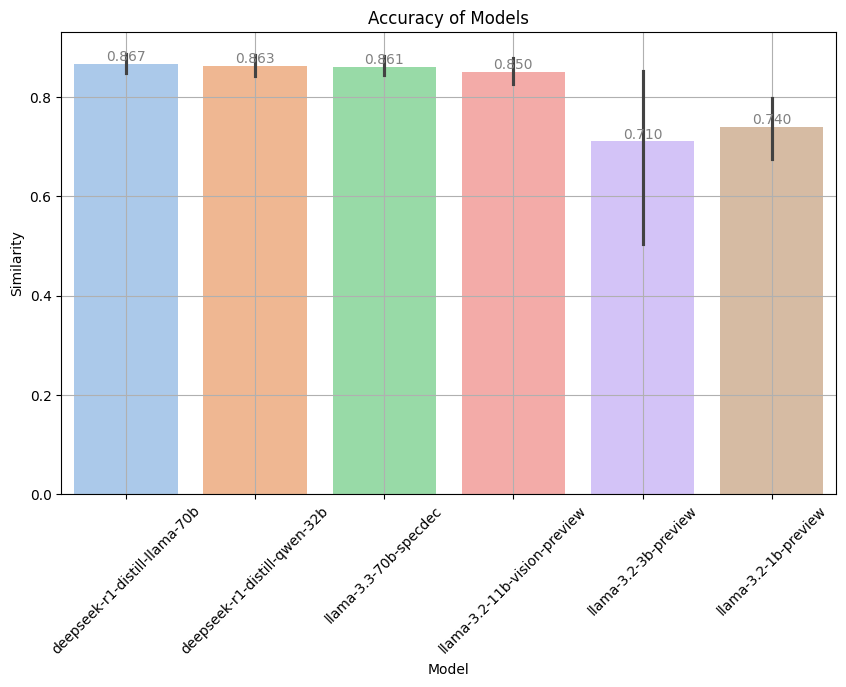

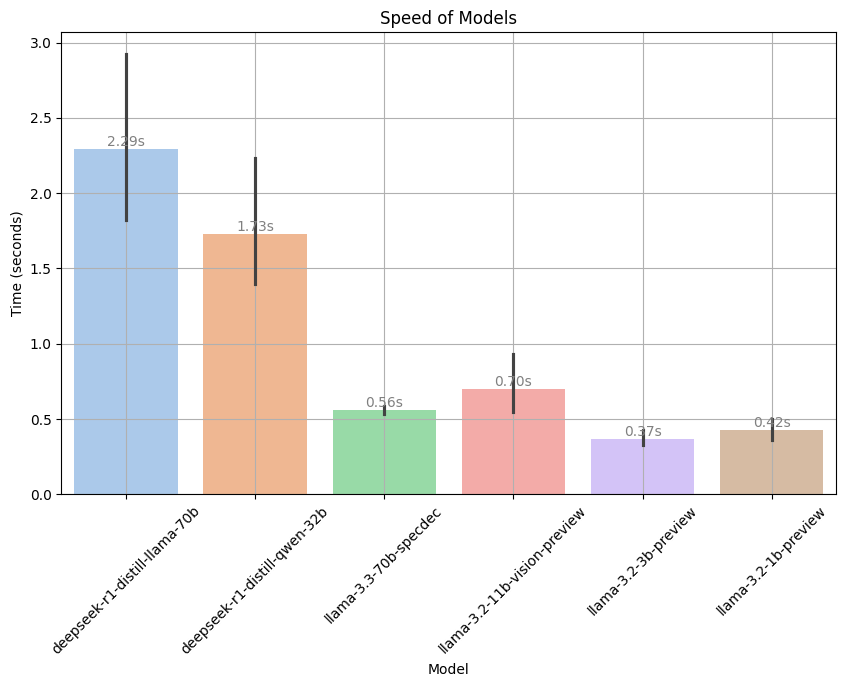

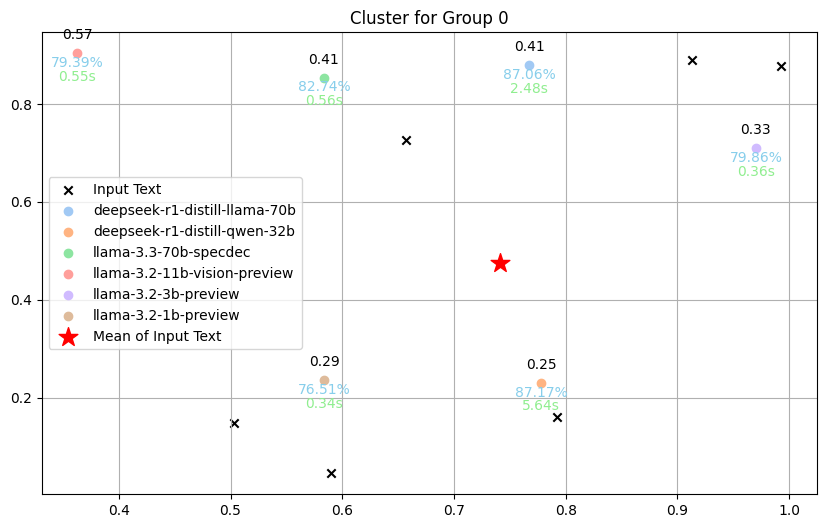

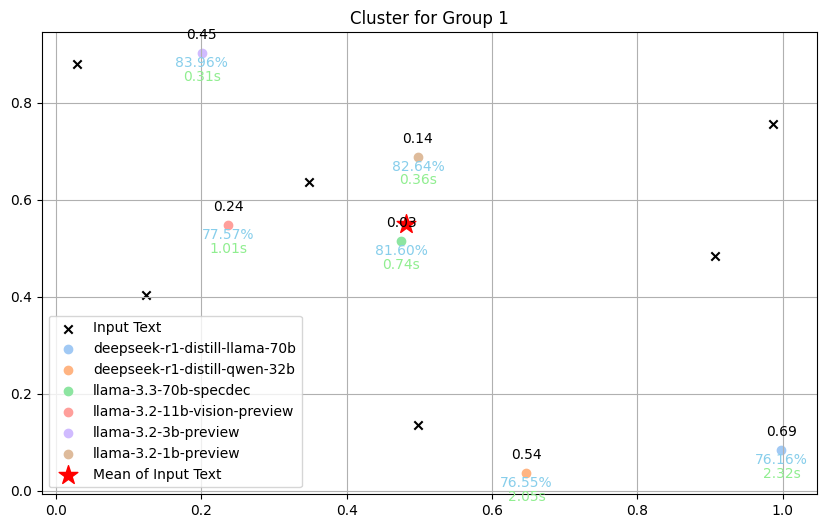

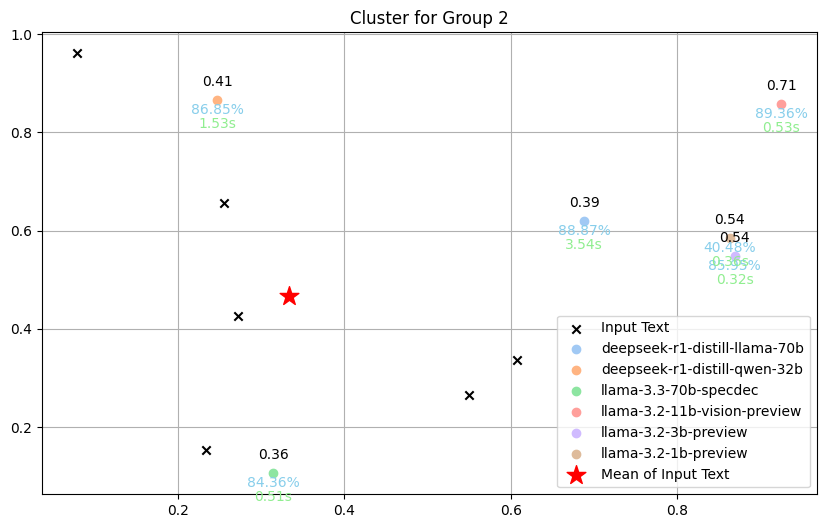

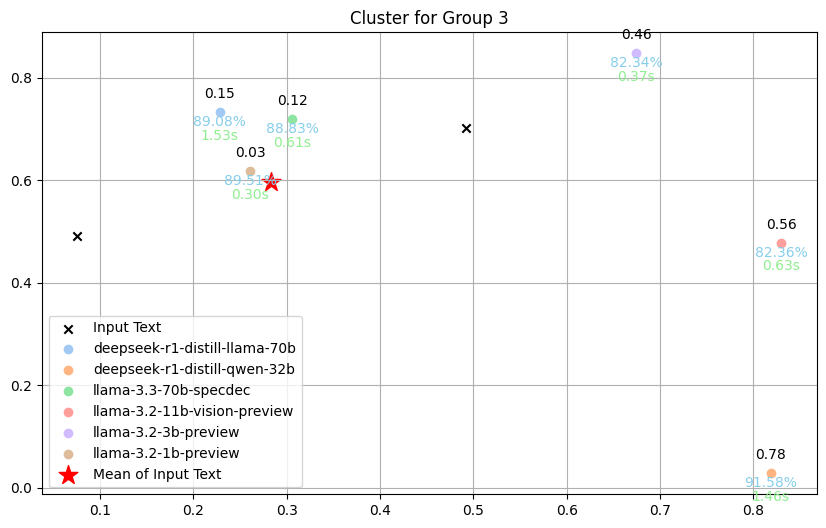

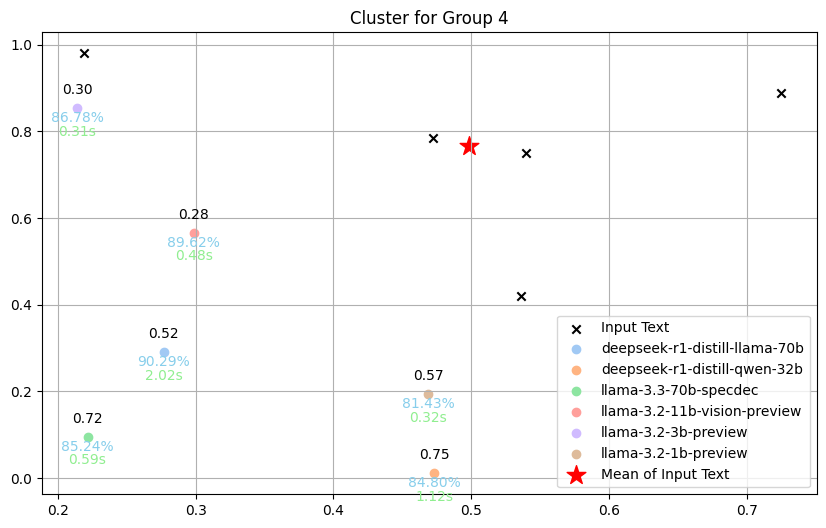

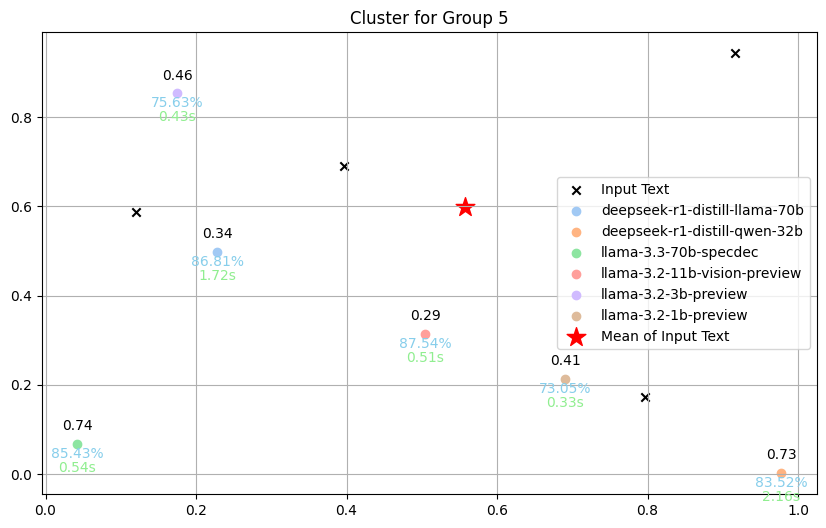

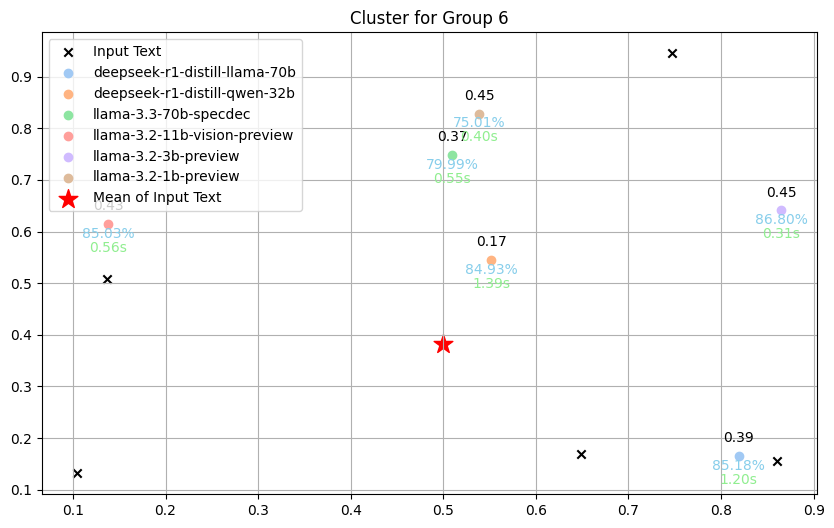

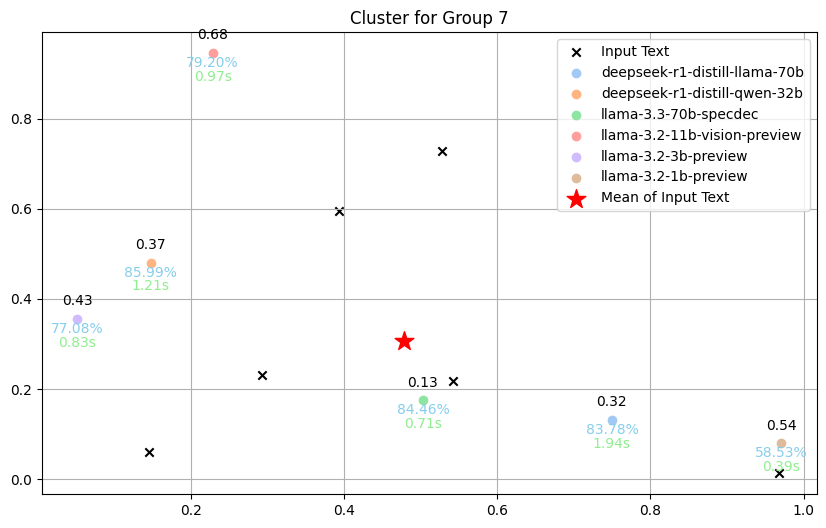

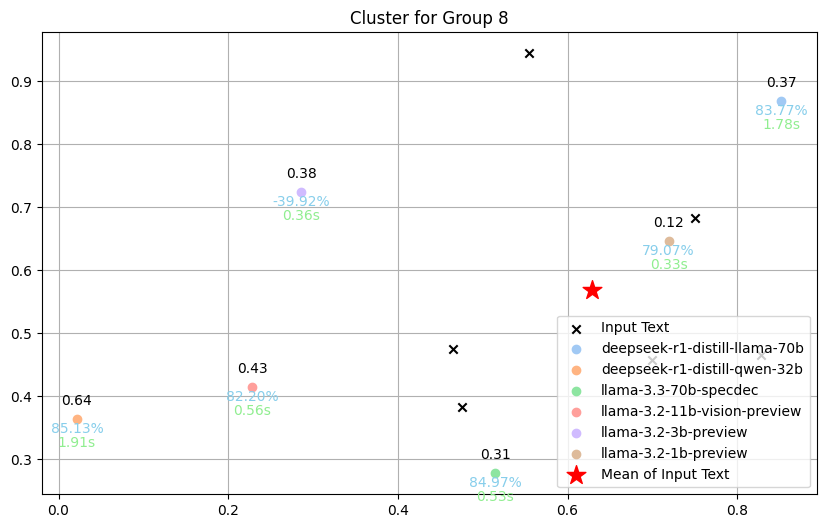

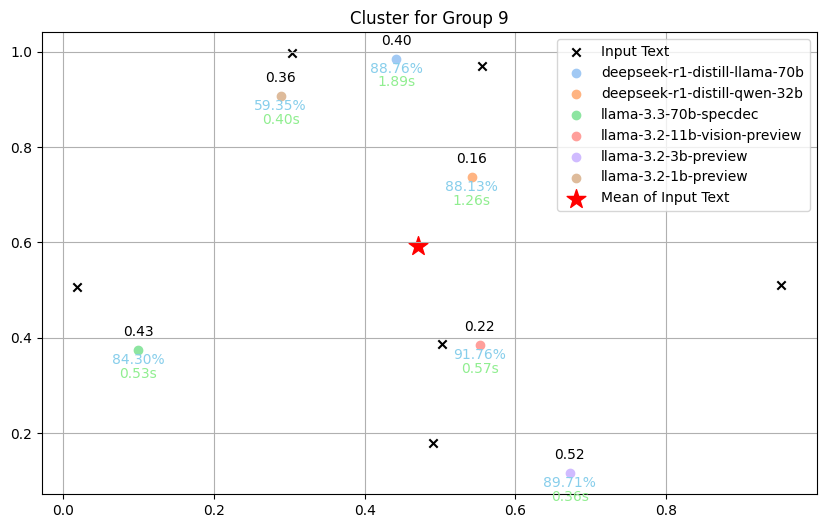

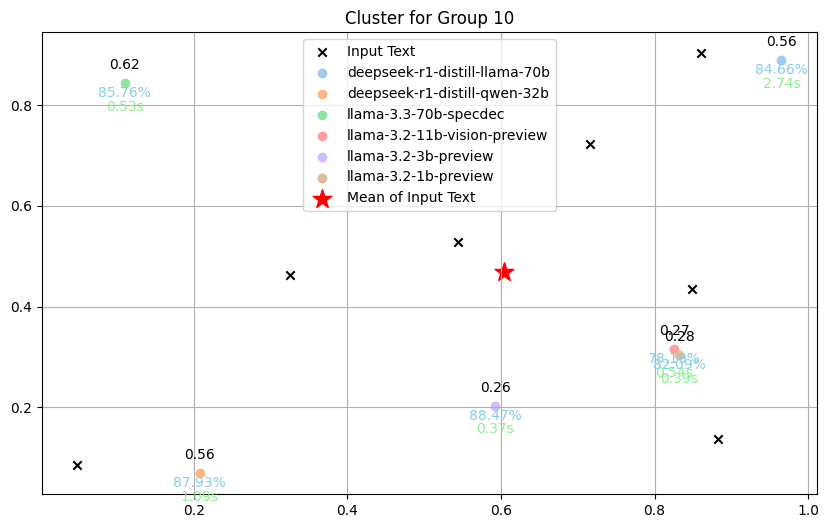

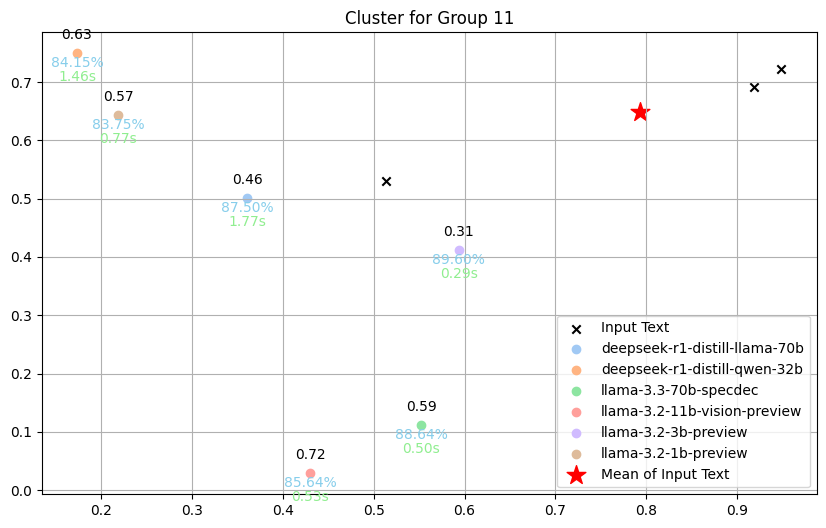

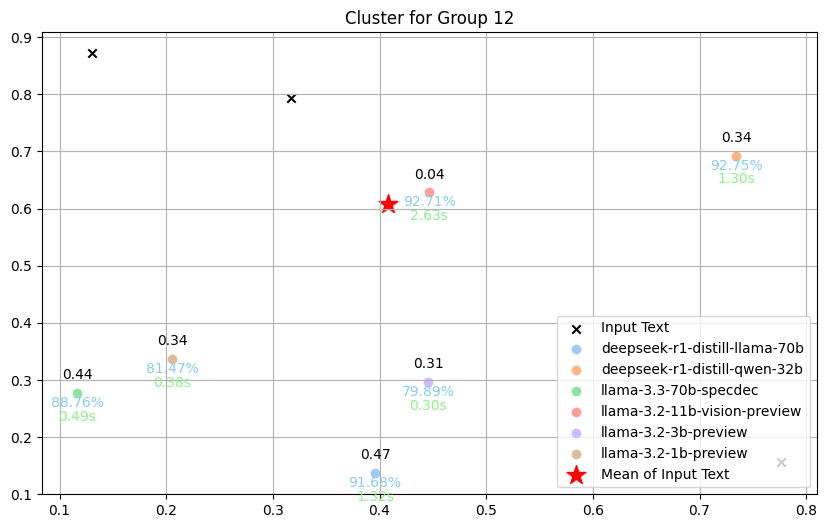

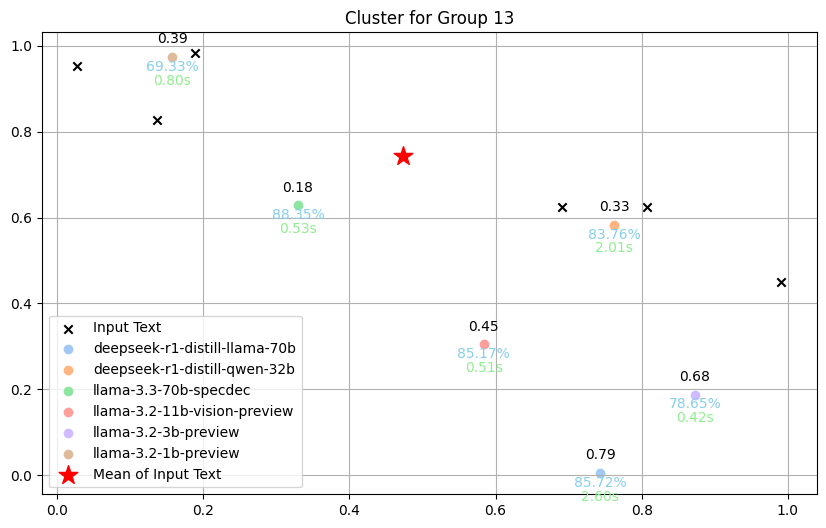

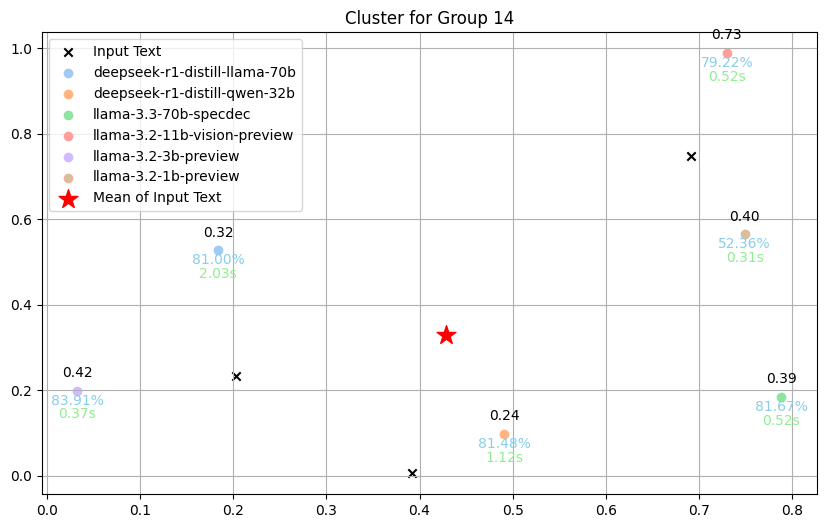

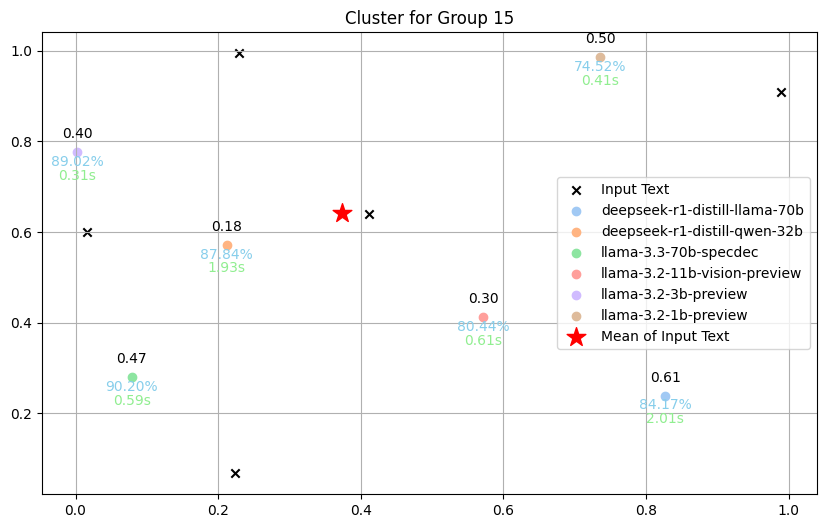

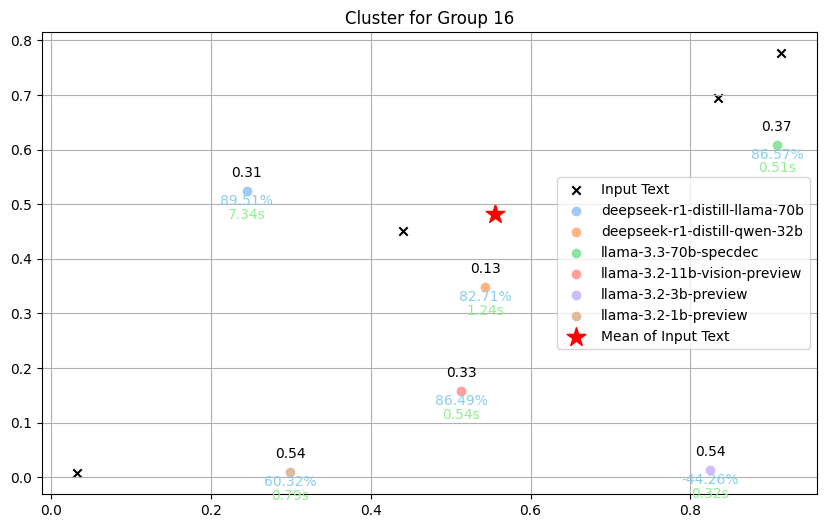

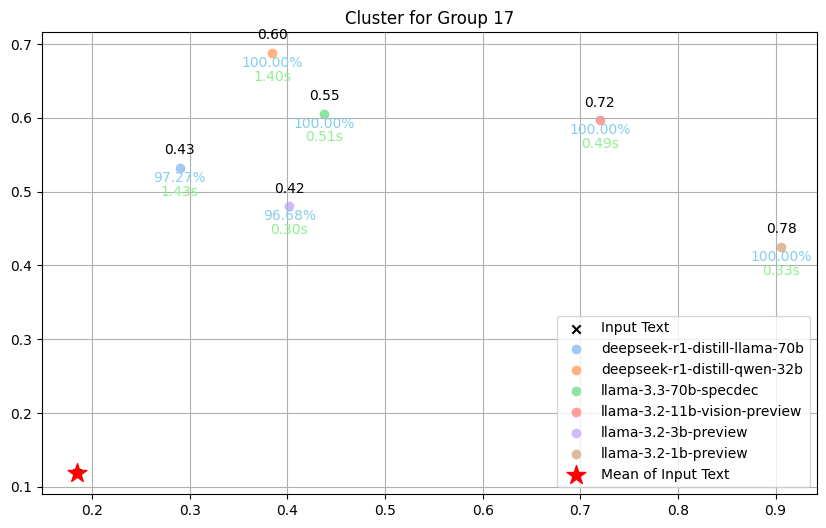

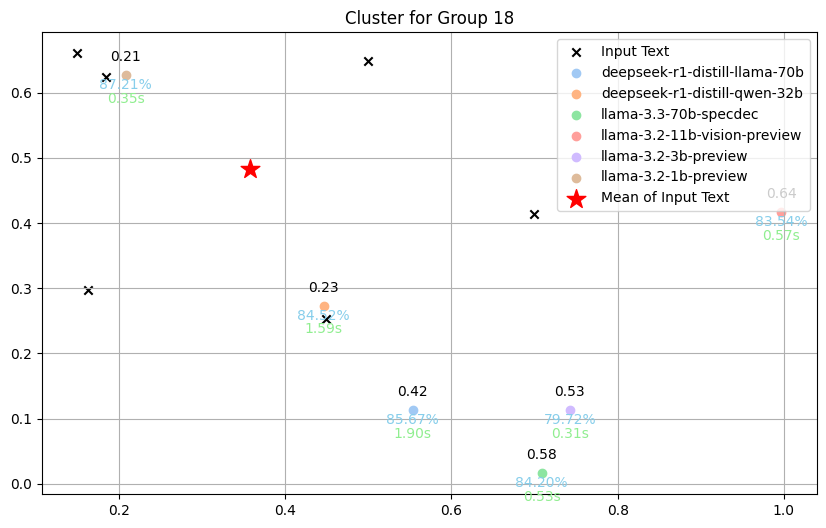

In [17]:
plot_accuracy_and_speed(data)
plot_clusters(data)